In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
%matplotlib inline
import seaborn as sns

In [85]:
# sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [86]:
#read data (make sure .csv in folder)
df = pd.read_csv('/Users/Admin/Desktop/nba_rookie_data.csv')

In [87]:
len(df)

1340

In [88]:
print(df.head())

              Name  Games Played  Minutes Played  Points Per Game  \
0   Brandon Ingram            36            27.4              7.4   
1  Andrew Harrison            35            26.9              7.2   
2   JaKarr Sampson            74            15.3              5.2   
3      Malik Sealy            58            11.6              5.7   
4      Matt Geiger            48            11.5              4.5   

   Field Goals Made  Field Goal Attempts  Field Goal Percent  3 Point Made  \
0               2.6                  7.6                34.7           0.5   
1               2.0                  6.7                29.6           0.7   
2               2.0                  4.7                42.2           0.4   
3               2.3                  5.5                42.6           0.1   
4               1.6                  3.0                52.4           0.0   

   3 Point Attempt  3 Point Percent  ...  Free Throw Attempts  \
0              2.1             25.0  ...           

In [89]:
df.index

RangeIndex(start=0, stop=1340, step=1)

In [90]:
df.columns

Index(['Name', 'Games Played', 'Minutes Played', 'Points Per Game',
       'Field Goals Made', 'Field Goal Attempts', 'Field Goal Percent',
       '3 Point Made', '3 Point Attempt', '3 Point Percent', 'Free Throw Made',
       'Free Throw Attempts', 'Free Throw Percent', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'TARGET_5Yrs'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1340 non-null   object 
 1   Games Played         1340 non-null   int64  
 2   Minutes Played       1340 non-null   float64
 3   Points Per Game      1340 non-null   float64
 4   Field Goals Made     1340 non-null   float64
 5   Field Goal Attempts  1340 non-null   float64
 6   Field Goal Percent   1340 non-null   float64
 7   3 Point Made         1340 non-null   float64
 8   3 Point Attempt      1340 non-null   float64
 9   3 Point Percent      1329 non-null   float64
 10  Free Throw Made      1340 non-null   float64
 11  Free Throw Attempts  1340 non-null   float64
 12  Free Throw Percent   1340 non-null   float64
 13  Offensive Rebounds   1340 non-null   float64
 14  Defensive Rebounds   1340 non-null   float64
 15  Rebounds             1340 non-null   f

In [92]:
df.describe()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [93]:
df.dtypes

Name                    object
Games Played             int64
Minutes Played         float64
Points Per Game        float64
Field Goals Made       float64
Field Goal Attempts    float64
Field Goal Percent     float64
3 Point Made           float64
3 Point Attempt        float64
3 Point Percent        float64
Free Throw Made        float64
Free Throw Attempts    float64
Free Throw Percent     float64
Offensive Rebounds     float64
Defensive Rebounds     float64
Rebounds               float64
Assists                float64
Steals                 float64
Blocks                 float64
Turnovers              float64
TARGET_5Yrs              int64
dtype: object

In [94]:
#print correlation coefficent for dataset
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_41360\1431176554.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
Games Played,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.038209,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
Minutes Played,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.165997,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
Points Per Game,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.151072,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
Field Goals Made,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.119493,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
Field Goal Attempts,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.197160,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
Field Goal Percent,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.330690,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3 Point Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.589855,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3 Point Attempt,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.582337,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3 Point Percent,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277,-0.003411
Free Throw Made,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.030320,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


<Axes: xlabel='TARGET_5Yrs', ylabel='count'>

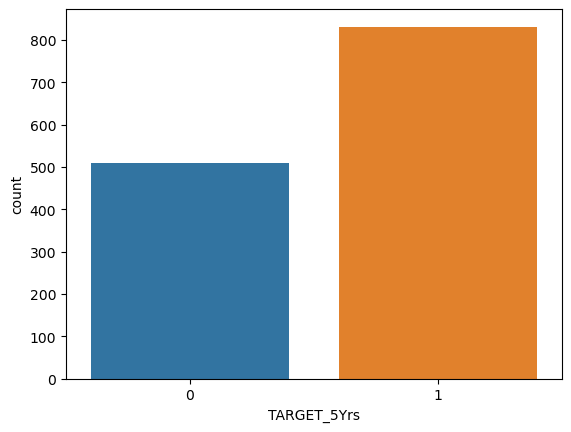

In [95]:
sns.countplot(x = 'TARGET_5Yrs', data=df)

In [96]:
df.isnull().sum()

Name                    0
Games Played            0
Minutes Played          0
Points Per Game         0
Field Goals Made        0
Field Goal Attempts     0
Field Goal Percent      0
3 Point Made            0
3 Point Attempt         0
3 Point Percent        11
Free Throw Made         0
Free Throw Attempts     0
Free Throw Percent      0
Offensive Rebounds      0
Defensive Rebounds      0
Rebounds                0
Assists                 0
Steals                  0
Blocks                  0
Turnovers               0
TARGET_5Yrs             0
dtype: int64

In [97]:
#to find percentage of null values
(df['3 Point Percent'].isna().sum()/len(df['3 Point Percent']))*100

0.8208955223880596

In [98]:
df['3 Point Percent'].mean()

19.308126410835214

In [99]:
df['3 Point Percent'].fillna(df['3 Point Percent'].mean(),inplace = True)

In [100]:
#to verify there are no null values anymore
df['3 Point Percent'].isna().sum()

0

In [101]:
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [102]:
df.drop(['Name'],axis=1, inplace = True)

In [103]:
df.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [104]:
X = df.iloc[:,[1]].values #inputs minutes played
y = df.iloc[:,19].values #target TARGET_5Yrs

In [105]:
print(X)

[[27.4]
 [26.9]
 [15.3]
 ...
 [12.1]
 [12. ]
 [11.7]]


In [106]:
print(y)

[0 0 0 ... 0 1 1]


In [107]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=0, test_size=1/3)

In [108]:
#construct model and fits to training data
logre = LogisticRegression()
logre.fit(X_train, y_train)

LogisticRegression()

In [109]:
logre.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [110]:
logre.score(X_test, y_test)

0.6510067114093959

In [111]:
logre.predict_proba(X_test)

array([[0.54920297, 0.45079703],
       [0.45978091, 0.54021909],
       [0.33017587, 0.66982413],
       [0.58915789, 0.41084211],
       [0.21512363, 0.78487637],
       [0.58520597, 0.41479403],
       [0.28509354, 0.71490646],
       [0.30891209, 0.69108791],
       [0.40188322, 0.59811678],
       [0.38631274, 0.61368726],
       [0.32837555, 0.67162445],
       [0.28842804, 0.71157196],
       [0.29686481, 0.70313519],
       [0.32122491, 0.67877509],
       [0.25460196, 0.74539804],
       [0.33379147, 0.66620853],
       [0.54111794, 0.45888206],
       [0.08050142, 0.91949858],
       [0.26717496, 0.73282504],
       [0.54718398, 0.45281602],
       [0.38245484, 0.61754516],
       [0.15743422, 0.84256578],
       [0.47804931, 0.52195069],
       [0.37861169, 0.62138831],
       [0.24694445, 0.75305555],
       [0.32479002, 0.67520998],
       [0.38438197, 0.61561803],
       [0.52488699, 0.47511301],
       [0.29686481, 0.70313519],
       [0.17200669, 0.82799331],
       [0.

In [112]:
y_pred=logre.predict([[20]])
print('predict a value', y_pred)

predict a value [1]


In [113]:
#output the accuracy score
print('our Accuracy is %2f' %logre.score(X_test,y_test))

our Accuracy is 0.651007


In [114]:
#print number of mislabled points
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

Number of mislabeled points out of a total 447 points : 156


In [115]:
predict=logre.predict(X_test)

In [116]:
#using confusion matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No', 'Predicted Yes'], index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,60,118
Actual Yes,38,231


In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.61      0.34      0.43       178
           1       0.66      0.86      0.75       269

    accuracy                           0.65       447
   macro avg       0.64      0.60      0.59       447
weighted avg       0.64      0.65      0.62       447



In [119]:
#using Smote

In [120]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [121]:
from imblearn.over_sampling import SMOTE

In [122]:
sm = SMOTE(random_state= 0)

In [123]:
X_res, y_res = sm.fit_resample (X_train, y_train)

<Axes: xlabel='TARGET_5Yrs', ylabel='count'>

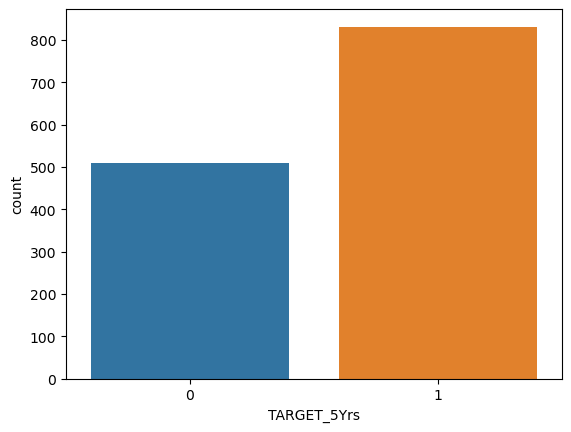

In [124]:
sns.countplot(x= 'TARGET_5Yrs', data =df)

In [125]:
from sklearn.metrics import classification_report 
logre = LogisticRegression(random_state=0)
logre.fit(X_res, y_res)

LogisticRegression(random_state=0)

In [126]:
#predicition of the test data
predict=logre.predict(X_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[129  49]
 [102 167]]
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       178
           1       0.77      0.62      0.69       269

    accuracy                           0.66       447
   macro avg       0.67      0.67      0.66       447
weighted avg       0.69      0.66      0.67       447



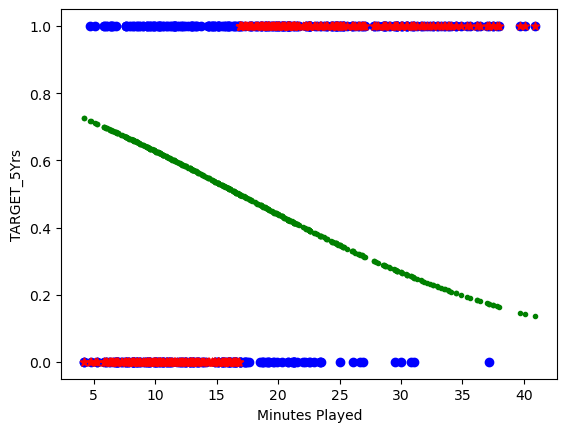

In [127]:
#visualise the model

fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test, color ='blue')
ax1.scatter(X_test, logre.predict(X_test), color='red', marker ='*')
ax1.scatter(X_test,logre.predict_proba(X_test)[:,0], color='green', marker='.')

ax1.set_xlabel('Minutes Played')
ax1.set_ylabel('TARGET_5Yrs')
fig1.savefig('Classplot_NBA.png')

MORE FEATURES FOR LOGISTIC REGRESSION ALOGORITHM

In [128]:
X = df.iloc[:,[0,1]].values #input games played and minutes played
y = df.iloc[:, 19].values #target Target_5yrs


In [129]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=1/3)

In [130]:
#construct model and fit to the training data
logre = LogisticRegression()
logre.fit(X_train, y_train)

LogisticRegression()

In [131]:
# performance metrics
print('Our Accuracy is %.2f' % logre.score(X_test, y_test))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

Our Accuracy is 0.74
Number of mislabeled points out of a total 447 points : 117


In [132]:
y_pred =logre.predict([[21,23]])
print ('predict a value:', y_pred)

predict a value: [0]


GAUSSIAN NAIVE BAYES ALGORITHM APPLIED ON DATASET

In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
import seaborn as sns

In [134]:
#sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

<Axes: >

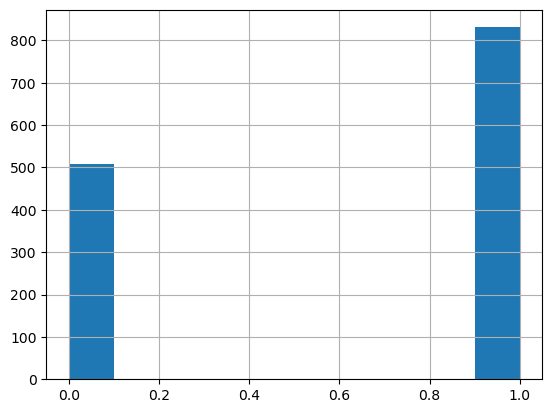

In [135]:
df['TARGET_5Yrs'].hist()

<Axes: >

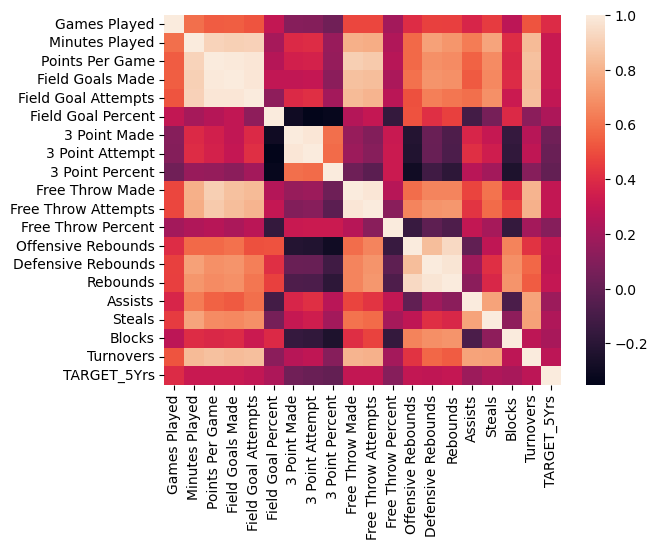

In [136]:
sns.heatmap(df.corr())

In [137]:
pip install pydataset

Note: you may need to restart the kernel to use updated packages.


GAUSSIAN NAIVE BAYES ALGORITHM APPLIED ON DATASET

In [138]:
X = df.iloc[:,[0,1]].values #input games played, minutes played
y = df.iloc[:, 19].values #target Target_5yrs


In [139]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=1/3, random_state = 2)

In [140]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [141]:
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       165
           1       0.75      0.72      0.73       282

    accuracy                           0.67       447
   macro avg       0.65      0.66      0.65       447
weighted avg       0.68      0.67      0.67       447



In [142]:
# performance metrics
print('Our Accuracy is %.2f' % gnb.score(X_test, y_test))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

Our Accuracy is 0.67
Number of mislabeled points out of a total 447 points : 147


In [143]:
y_pred =gnb.predict([[10,56]])

In [144]:
print('predict a value:', y_pred)

predict a value: [1]


using 3 Features 

In [145]:
X = df.iloc[:, [7,8,9]].values #3 input features (3 points made, 3 point attempt, 3 point percent)
y = df.iloc[:, 19].values #target feature Target 5yrs

In [146]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=1/3, random_state = 2)

In [147]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [148]:
# performance metrics
print('Our Accuracy is %.2f' % gnb.score(X_test, y_test))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

Our Accuracy is 0.61
Number of mislabeled points out of a total 447 points : 176


In [149]:
y_pred =gnb.predict([[3,8,25]])

In [150]:
print('predict a value:', y_pred)

predict a value: [1]


NEURAL NETWORKS WITH LOGISTIC REGRESSION

In [152]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
from matplotlib.colors import Normalize, ListedColormap

In [163]:
#sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [164]:
X = df.iloc[:, [1]].values #input games played
y = df.iloc[:, 19].values #target target_5yrs

In [165]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=1/3, random_state = 0)

In [166]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [167]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

NEURAL NETWORKS WITH LOGISTIC REGRESSION

In [168]:
# setup the neural network architecture
mlp = MLPClassifier(hidden_layer_sizes=(50,30,20),
activation="logistic", random_state=0, max_iter=2000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 30, 20),
              max_iter=2000, random_state=0)

In [169]:
predictions = mlp.predict(X_test)

In [171]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 67 111]
 [ 44 225]]
              precision    recall  f1-score   support

           0       0.60      0.38      0.46       178
           1       0.67      0.84      0.74       269

    accuracy                           0.65       447
   macro avg       0.64      0.61      0.60       447
weighted avg       0.64      0.65      0.63       447



In [172]:
# performance metrics
print('Our Accuracy is %.2f' % mlp.score(X_test, y_test))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Our Accuracy is 0.65
Number of mislabeled points out of a total 447 points : 155


In [173]:
#make prediction of a test point
test_point = np.array([[10]])
print('prediction:', mlp.predict(test_point))

prediction: [1]


In [174]:
#make prediction of a test point
test_point = np.array([[25]])
print('prediction:', mlp.predict(test_point))

prediction: [1]


NEURAL NETWORKS WITH HIDDEN LAYERS

In [175]:
X = df.iloc[:, [1]].values #input games played
y = df.iloc[:, 19].values # target Target_5yrs


In [176]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=1/3, random_state = 0)

In [177]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

NEURAL NETWORKS WITH HIDDEN LAYERS

In [178]:
# setup the neural network architecture
mlp = MLPClassifier(hidden_layer_sizes=(50,30,20),
activation="tanh", random_state=0, max_iter=2000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 30, 20), max_iter=2000,
              random_state=0)

In [179]:
predictions = mlp.predict(X_test)

In [180]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 53 125]
 [ 32 237]]
              precision    recall  f1-score   support

           0       0.62      0.30      0.40       178
           1       0.65      0.88      0.75       269

    accuracy                           0.65       447
   macro avg       0.64      0.59      0.58       447
weighted avg       0.64      0.65      0.61       447



In [181]:
# performance metrics
print('Our Accuracy is %.2f' % mlp.score(X_test, y_test))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Our Accuracy is 0.65
Number of mislabeled points out of a total 447 points : 157


In [182]:
#make prediction of a test point
test_point = np.array([[25]])
print('prediction:', mlp.predict(test_point))

prediction: [1]


In [183]:
#make prediction of a test point
test_point = np.array([[35]])
print('prediction:', mlp.predict(test_point))

prediction: [1]


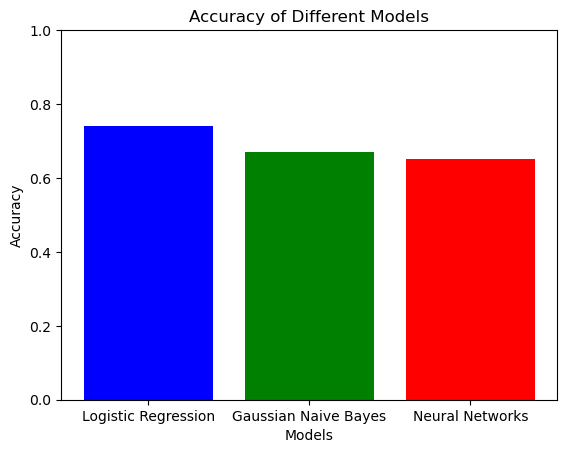

In [187]:
models =['Logistic Regression', 'Gaussian Naive Bayes', 'Neural Networks']
accuracy_scores = [0.74,0.67,0.65]
plt.bar(models,accuracy_scores, color=['blue','green','red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.savefig('Compare_models.png')
plt.ylim(0,1)
plt.show()

<Figure size 640x480 with 0 Axes>